# Autoencoders example

import the necessary libraries for working with PyTorch, including torch for tensor operations, nn for neural network modules, torchvision for datasets and transforms, and matplotlib.pyplot for plotting.

In [2]:

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Sets the device to either GPU ('cuda') if available, otherwise, it uses the CPU ('cpu')

In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Define hyperparameters for the autoencoder model, including the input size (28x28 = 784), the size of the hidden layer, the number of epochs for training, the batch size for data loading, and the learning rate for optimization.

In [4]:
# Hyper-parameters
input_size = 784
hidden_size = 256
num_epochs = 10
batch_size = 100
learning_rate = 0.001


Loads the MNIST dataset from torchvision.datasets.MNIST. It also applies a transformation to convert the images to PyTorch tensors.

In [5]:

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)




Creates a DataLoader object for batching and shuffling the training dataset.


In [6]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

Defines the autoencoder model as a subclass of nn.Module. It consists of an encoder and a decoder, each implemented as a Sequential container of neural network layers. The encoder uses a linear layer followed by a ReLU activation function, while the decoder uses a linear layer followed by a Sigmoid activation function.

In [7]:
# Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU())
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size, input_size),
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

Creates an instance of the Autoencoder class and moves it to the specified device (GPU or CPU).

In [8]:
model = Autoencoder(input_size, hidden_size).to(device)


Define the loss function (Mean Squared Error) and the optimizer (Adam) for training the autoencoder model.

In [10]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Perform the training loop over the specified number of epochs. Within each epoch, it iterates through batches of data from the DataLoader, computes the output of the autoencoder, calculates the loss between the input and reconstructed output, performs backpropagation to update the model parameters, and prints the loss for monitoring training progress.

In [11]:
# Training the autoencoder
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)
        img = img.to(device)

        # Forward pass
        output = model(img)
        loss = criterion(output, img)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')






Epoch [1/10], Loss: 0.0096
Epoch [2/10], Loss: 0.0048
Epoch [3/10], Loss: 0.0029
Epoch [4/10], Loss: 0.0025
Epoch [5/10], Loss: 0.0019
Epoch [6/10], Loss: 0.0019
Epoch [7/10], Loss: 0.0017
Epoch [8/10], Loss: 0.0013
Epoch [9/10], Loss: 0.0013
Epoch [10/10], Loss: 0.0014


Test the trained autoencoder on a batch of data from the training loader. It computes the output of the autoencoder for the input images.

In [12]:
# Test the autoencoder
with torch.no_grad():
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)
        img = img.to(device)
        output = model(img)
        break

Visualize a few original and reconstructed images from the test batch using matplotlib. It plots the original images in the top row and their corresponding reconstructed images in the bottom row.

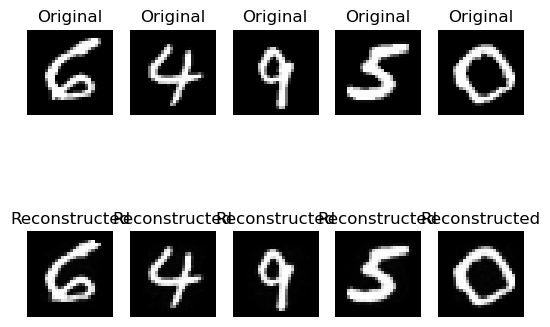

In [13]:

# Visualize input and output images
num_images = 5
for i in range(num_images):
    # Original image
    plt.subplot(2, num_images, i + 1)
    plt.imshow(img[i].cpu().numpy().reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Reconstructed image
    plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(output[i].cpu().numpy().reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()
